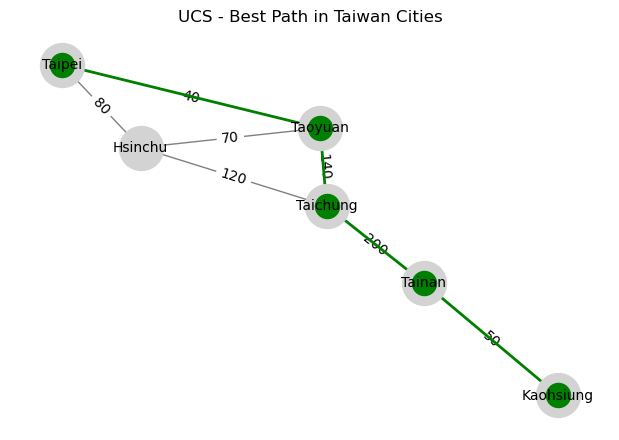

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def ucs_path(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = {}

    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        path = path + [node]

        if node == goal:
            return path

        if node not in visited or cost < visited[node]:
            visited[node] = cost
            for neighbor, weight in graph.get(node, []):
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))

    return []

# Taiwan Cities with Distance (in km)
taiwan_weighted_graph = {
    'Taipei': [('Taoyuan', 40), ('Hsinchu', 80)],
    'Taoyuan': [('Taipei', 40), ('Hsinchu', 70), ('Taichung', 140)],
    'Hsinchu': [('Taipei', 80), ('Taoyuan', 70), ('Taichung', 120)],
    'Taichung': [('Taoyuan', 140), ('Hsinchu', 120), ('Tainan', 200)],
    'Tainan': [('Taichung', 200), ('Kaohsiung', 50)],
    'Kaohsiung': [('Tainan', 50)]
}

# Convert to NetworkX Graph
G_weighted = nx.Graph()
for city, roads in taiwan_weighted_graph.items():
    for neighbor, distance in roads:
        G_weighted.add_edge(city, neighbor, weight=distance)

# Run UCS
ucs_result = ucs_path(taiwan_weighted_graph, 'Taipei', 'Kaohsiung')

# Draw Graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=1000, font_size=10)
labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)

# Highlight UCS path
path_edges = list(zip(ucs_result, ucs_result[1:]))
nx.draw_networkx_edges(G_weighted, pos, edgelist=path_edges, edge_color='green', width=2)
nx.draw_networkx_nodes(G_weighted, pos, nodelist=ucs_result, node_color='green')

plt.title("UCS - Best Path in Taiwan Cities")
plt.show()
